In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '40e02192-3ca1-4062-b714-c09ac4408d82',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  


{'status': {'timestamp': '2023-12-15T16:31:09.893Z', 'error_code': 0, 'error_message': None, 'elapsed': 11, 'credit_count': 1, 'notice': None, 'total_count': 8914}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10649, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [3]:
type(data)

dict

In [4]:
import pandas as pd

pd.set_option('display.max_columns', None)


In [5]:
#normalize data
df = pd.json_normalize(data['data'])
df['timestamp']=pd.to_datetime('now')
df

C:\Users\Zunera Ali\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10649,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.957076e+07,1.957076e+07,False,NaN,1,NaN,NaN,None,2023-12-15T16:30:00.000Z,41978.092391,2.155721e+10,-24.8380,-0.067317,-1.308367,-4.368983,15.448734,49.312526,58.281289,8.215430e+11,51.5942,8.815399e+11,None,2023-12-15T16:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-15 16:31:14.848770
1,1027,Ethereum,ETH,ethereum,8052,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202066e+08,1.202066e+08,True,NaN,2,NaN,NaN,None,2023-12-15T16:30:00.000Z,2241.651857,1.083249e+10,-19.9338,0.149407,-1.562951,-4.869490,11.286488,42.118518,37.102809,2.694614e+11,16.9298,2.694614e+11,None,2023-12-15T16:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-15 16:31:14.848770
2,825,Tether USDt,USDT,tether,68264,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.081794e+10,9.360908e+10,True,NaN,3,NaN,NaN,None,2023-12-15T16:29:00.000Z,0.999892,4.748114e+10,-12.3981,-0.002445,-0.021791,-0.033951,-0.051961,-0.061661,-0.086794,9.080812e+10,5.7029,9.359895e+10,None,2023-12-15T16:29:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-12-15 16:31:14.848770
3,1839,BNB,BNB,bnb,1851,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.516958e+08,1.516958e+08,False,NaN,4,NaN,NaN,None,2023-12-15T16:29:00.000Z,246.903794,7.746999e+08,-13.7346,0.158670,-1.759642,4.786165,-1.909529,15.844680,15.240802,3.745426e+10,2.3525,3.745426e+10,None,2023-12-15T16:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-15 16:31:14.848770
4,52,XRP,XRP,xrp,1174,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.400560e+10,9.998815e+10,False,NaN,5,NaN,NaN,None,2023-12-15T16:30:00.000Z,0.621072,1.433566e+09,-5.5319,0.353380,-0.685096,-6.412463,-2.763254,26.173760,24.358865,3.354136e+10,2.1074,6.210719e+10,None,2023-12-15T16:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-15 16:31:14.848770
5,5426,Solana,SOL,solana,561,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.276173e+08,5.648738e+08,True,NaN,6,NaN,NaN,None,2023-12-15T16:30:00.000Z,75.552630,2.881141e+09,14.5864,-0.428228,2.860727,3.552381,21.688886,225.279493,298.298933,3.230761e+10,2.0282,4.267770e+10,None,2023-12-15T16:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-15 16:31:14.848770
6,3408,USDC,USDC,usd-coin,15555,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.446599e+10,2.446599e+10,False,NaN,7,NaN,NaN,None,2023-12-15T16:29:00.000Z,1.000241,5.808862e+09,-17.2561,0.010570,0.020489,0.017029,0.006236,0.000590,-0.044538,2.447188e+10,1.5392,2.447188e+10,None,2023-12-15T16:29:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-12-15 16:31:14.848770
7,2010,Cardano,ADA,cardano,1004,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.533427e+10,3.643998e+10,False,NaN,8,NaN,NaN,None,2023-12-15T16:29:00.000Z,0.625675,8.603126e+08,-52.3014,1.178016,-2.743079,12.179896,69.026683,149.467132,150.396125,2.210777e+10,1.3884,2.815538e+10,None,2023-12-15T16:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-15 16:31:14.848770
8,5805,Avalanche,AVAX,avalanche,596,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capita

In [20]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '40e02192-3ca1-4062-b714-c09ac4408d82',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp']=pd.to_datetime('now')
    df 
    
    if not os.path.isfile(r'C:\Users\Zunera Ali\Desktop\Data Analysis\APIProject.csv'):
        df.to_csv(r'C:\Users\Zunera Ali\Desktop\Data Analysis\APIProject.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\Zunera Ali\Desktop\Data Analysis\APIProject.csv', mode='a',header=False)
        

        

In [21]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60)
exit()    

C:\Users\Zunera Ali\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API Runner completed


KeyboardInterrupt: 

In [18]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10649,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.957076e+07,1.957076e+07,False,NaN,1,NaN,NaN,None,2023-12-15T16:30:00.000Z,41978.092391,2.155721e+10,-24.8380,-0.067317,-1.308367,-4.368983,15.448734,49.312526,58.281289,8.215430e+11,51.5942,8.815399e+11,None,2023-12-15T16:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-15 16:31:14.848770
1,1027,Ethereum,ETH,ethereum,8052,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202066e+08,1.202066e+08,True,NaN,2,NaN,NaN,None,2023-12-15T16:30:00.000Z,2241.651857,1.083249e+10,-19.9338,0.149407,-1.562951,-4.869490,11.286488,42.118518,37.102809,2.694614e+11,16.9298,2.694614e+11,None,2023-12-15T16:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-15 16:31:14.848770
2,825,Tether USDt,USDT,tether,68264,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.081794e+10,9.360908e+10,True,NaN,3,NaN,NaN,None,2023-12-15T16:29:00.000Z,0.999892,4.748114e+10,-12.3981,-0.002445,-0.021791,-0.033951,-0.051961,-0.061661,-0.086794,9.080812e+10,5.7029,9.359895e+10,None,2023-12-15T16:29:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-12-15 16:31:14.848770
3,1839,BNB,BNB,bnb,1851,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.516958e+08,1.516958e+08,False,NaN,4,NaN,NaN,None,2023-12-15T16:29:00.000Z,246.903794,7.746999e+08,-13.7346,0.158670,-1.759642,4.786165,-1.909529,15.844680,15.240802,3.745426e+10,2.3525,3.745426e+10,None,2023-12-15T16:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-15 16:31:14.848770
4,52,XRP,XRP,xrp,1174,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.400560e+10,9.998815e+10,False,NaN,5,NaN,NaN,None,2023-12-15T16:30:00.000Z,0.621072,1.433566e+09,-5.5319,0.353380,-0.685096,-6.412463,-2.763254,26.173760,24.358865,3.354136e+10,2.1074,6.210719e+10,None,2023-12-15T16:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-15 16:31:14.848770
5,5426,Solana,SOL,solana,561,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.276173e+08,5.648738e+08,True,NaN,6,NaN,NaN,None,2023-12-15T16:30:00.000Z,75.552630,2.881141e+09,14.5864,-0.428228,2.860727,3.552381,21.688886,225.279493,298.298933,3.230761e+10,2.0282,4.267770e+10,None,2023-12-15T16:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-15 16:31:14.848770
6,3408,USDC,USDC,usd-coin,15555,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.446599e+10,2.446599e+10,False,NaN,7,NaN,NaN,None,2023-12-15T16:29:00.000Z,1.000241,5.808862e+09,-17.2561,0.010570,0.020489,0.017029,0.006236,0.000590,-0.044538,2.447188e+10,1.5392,2.447188e+10,None,2023-12-15T16:29:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-12-15 16:31:14.848770
7,2010,Cardano,ADA,cardano,1004,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.533427e+10,3.643998e+10,False,NaN,8,NaN,NaN,None,2023-12-15T16:29:00.000Z,0.625675,8.603126e+08,-52.3014,1.178016,-2.743079,12.179896,69.026683,149.467132,150.396125,2.210777e+10,1.3884,2.815538e+10,None,2023-12-15T16:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-15 16:31:14.848770
8,5805,Avalanche,AVAX,avalanche,596,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capita

In [22]:
df72 = pd.read_csv(r'C:\Users\Zunera Ali\Desktop\Data Analysis\APIProject.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10649,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.957076e+07,1.957076e+07,False,NaN,1,NaN,NaN,NaN,2023-12-15T16:30:00.000Z,41978.092391,2.155721e+10,-24.8380,-0.067317,-1.308367,-4.368983,15.448734,49.312526,58.281289,8.215430e+11,51.5942,8.815399e+11,NaN,2023-12-15T16:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-15 16:31:14.848770
1,1,1027,Ethereum,ETH,ethereum,8052,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202066e+08,1.202066e+08,True,NaN,2,NaN,NaN,NaN,2023-12-15T16:30:00.000Z,2241.651857,1.083249e+10,-19.9338,0.149407,-1.562951,-4.869490,11.286488,42.118518,37.102809,2.694614e+11,16.9298,2.694614e+11,NaN,2023-12-15T16:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-15 16:31:14.848770
2,2,825,Tether USDt,USDT,tether,68264,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,9.081794e+10,9.360908e+10,True,NaN,3,NaN,NaN,NaN,2023-12-15T16:29:00.000Z,0.999892,4.748114e+10,-12.3981,-0.002445,-0.021791,-0.033951,-0.051961,-0.061661,-0.086794,9.080812e+10,5.7029,9.359895e+10,NaN,2023-12-15T16:29:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-12-15 16:31:14.848770
3,3,1839,BNB,BNB,bnb,1851,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.516958e+08,1.516958e+08,False,NaN,4,NaN,NaN,NaN,2023-12-15T16:29:00.000Z,246.903794,7.746999e+08,-13.7346,0.158670,-1.759642,4.786165,-1.909529,15.844680,15.240802,3.745426e+10,2.3525,3.745426e+10,NaN,2023-12-15T16:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-15 16:31:14.848770
4,4,52,XRP,XRP,xrp,1174,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.400560e+10,9.998815e+10,False,NaN,5,NaN,NaN,NaN,2023-12-15T16:30:00.000Z,0.621072,1.433566e+09,-5.5319,0.353380,-0.685096,-6.412463,-2.763254,26.173760,24.358865,3.354136e+10,2.1074,6.210719e+10,NaN,2023-12-15T16:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-15 16:31:14.848770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,10,1958,TRON,TRX,tron,887,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'dwf-l...",NaN,8.842198e+10,8.842201e+10,True,NaN,11,7.165966e+10,7.391157e+09,NaN,2023-12-15T16:31:00.000Z,0.103143,2.422644e+08,-7.4536,-0.297331,-2.269588,-3.068501,-0.517604,16.847524,23.256825,9.120065e+09,0.5725,9.120068e+09,NaN,2023-12-15T16:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-15 16:33:44.353161
116,11,6636,Polkadot,DOT,polkadot-new,643,2020-08-19T00:00:00.000Z,"['substrate', 'polkadot', 'binance-chain', 'po...",NaN,1.274747e+09,1.389061e+09,True,NaN,12,NaN,NaN,NaN,2023-12-15T16:31:00.000Z,7.151429,4.352639e+08,-13.0102,0.844306,-2.090937,5.150583,31.661903,89.947643,72.232006,9.116259e+09,0.5729,9.933769e+09,NaN,2023-12-15T16:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-15 16:33:44.353161
117,12,1975,Chainlink,LINK,chainlink,1503,2017-09-20T00:00:00.000Z,"['platform', 'defi', 'oracles', 'smart-contrac...",1.000000e+09,5.568500e+08,1.000000e+09,False,NaN,13,NaN,NaN,NaN,2023-12-15T16:31:00.000Z,14.802588,5.668804e+08,-16.2108,0.254037,-0.730114,-11.961017,0.105817,98.517211,137.622815,8.242821e+09,0.5177,1.480259e+10,NaN,2023-12-15T16:31:00.000Z,

In [25]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10649,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19570756.00000,19570756.00000,False,NaN,1,NaN,NaN,None,2023-12-15T16:30:00.000Z,41978.09239,21557213096.59737,-24.83800,-0.06732,-1.30837,-4.36898,15.44873,49.31253,58.28129,821543003527.49219,51.59420,881539940208.60999,None,2023-12-15T16:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-15 16:31:14.848770
1,1027,Ethereum,ETH,ethereum,8052,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120206615.73645,120206615.73645,True,NaN,2,NaN,NaN,None,2023-12-15T16:30:00.000Z,2241.65186,10832486332.22497,-19.93380,0.14941,-1.56295,-4.86949,11.28649,42.11852,37.10281,269461383352.24347,16.92980,269461383352.23999,None,2023-12-15T16:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-15 16:31:14.848770
2,825,Tether USDt,USDT,tether,68264,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,90817944690.44743,93609080552.15282,True,NaN,3,NaN,NaN,None,2023-12-15T16:29:00.000Z,0.99989,47481138437.99272,-12.39810,-0.00244,-0.02179,-0.03395,-0.05196,-0.06166,-0.08679,90808116235.73495,5.70290,93598950036.50999,None,2023-12-15T16:29:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-12-15 16:31:14.848770
3,1839,BNB,BNB,bnb,1851,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151695754.95229,151695754.95229,False,NaN,4,NaN,NaN,None,2023-12-15T16:29:00.000Z,246.90379,774699868.99201,-13.73460,0.15867,-1.75964,4.78617,-1.90953,15.84468,15.24080,37454257425.94937,2.35250,37454257425.95000,None,2023-12-15T16:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-15 16:31:14.848770
4,52,XRP,XRP,xrp,1174,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54005597115.00000,99988151135.00000,False,NaN,5,NaN,NaN,None,2023-12-15T16:30:00.000Z,0.62107,1433566323.50051,-5.53190,0.35338,-0.68510,-6.41246,-2.76325,26.17376,24.35887,33541359405.58790,2.10740,62107191101.26000,None,2023-12-15T16:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-15 16:31:14.848770
5,5426,Solana,SOL,solana,561,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,427617330.48238,564873846.03182,True,NaN,6,NaN,NaN,None,2023-12-15T16:30:00.000Z,75.55263,2881141027.89085,14.58640,-0.42823,2.86073,3.55238,21.68889,225.27949,298.29893,32307613765.20408,2.02820,42677704439.79000,None,2023-12-15T16:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-15 16:31:14.848770
6,3408,USDC,USDC,usd-coin,15555,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,24465985617.39843,24465985617.39843,False,NaN,7,NaN,NaN,None,2023-12-15T16:29:00.000Z,1.00024,5808862490.33325,-17.25610,0.01057,0.02049,0.01703,0.00624,0.00059,-0.04454,24471884098.57436,1.53920,24471884098.57000,None,2023-12-15T16:29:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-12-15 16:31:14.848770
7,2010,Cardano,ADA,cardano,1004,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35334265534.96500,36439975031.08700,False,NaN,8,NaN,NaN,None,2023-12-15T16:29:00.000Z,0.62568,860312630.01851,-52.30140,1.17802,-2.74308,12.17990,69.02668,149.46713,150.39613,22107773077.17610,1.38840,28155383263.55000,None,2023-12-15T16:29:

In [24]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [26]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10649,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19570756.00000,19570756.00000,False,NaN,1,NaN,NaN,None,2023-12-15T16:30:00.000Z,41978.09239,21557213096.59737,-24.83800,-0.06732,-1.30837,-4.36898,15.44873,49.31253,58.28129,821543003527.49219,51.59420,881539940208.60999,None,2023-12-15T16:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-15 16:31:14.848770
1,1027,Ethereum,ETH,ethereum,8052,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120206615.73645,120206615.73645,True,NaN,2,NaN,NaN,None,2023-12-15T16:30:00.000Z,2241.65186,10832486332.22497,-19.93380,0.14941,-1.56295,-4.86949,11.28649,42.11852,37.10281,269461383352.24347,16.92980,269461383352.23999,None,2023-12-15T16:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-15 16:31:14.848770
2,825,Tether USDt,USDT,tether,68264,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,90817944690.44743,93609080552.15282,True,NaN,3,NaN,NaN,None,2023-12-15T16:29:00.000Z,0.99989,47481138437.99272,-12.39810,-0.00244,-0.02179,-0.03395,-0.05196,-0.06166,-0.08679,90808116235.73495,5.70290,93598950036.50999,None,2023-12-15T16:29:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-12-15 16:31:14.848770
3,1839,BNB,BNB,bnb,1851,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151695754.95229,151695754.95229,False,NaN,4,NaN,NaN,None,2023-12-15T16:29:00.000Z,246.90379,774699868.99201,-13.73460,0.15867,-1.75964,4.78617,-1.90953,15.84468,15.24080,37454257425.94937,2.35250,37454257425.95000,None,2023-12-15T16:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-15 16:31:14.848770
4,52,XRP,XRP,xrp,1174,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54005597115.00000,99988151135.00000,False,NaN,5,NaN,NaN,None,2023-12-15T16:30:00.000Z,0.62107,1433566323.50051,-5.53190,0.35338,-0.68510,-6.41246,-2.76325,26.17376,24.35887,33541359405.58790,2.10740,62107191101.26000,None,2023-12-15T16:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-15 16:31:14.848770
5,5426,Solana,SOL,solana,561,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,427617330.48238,564873846.03182,True,NaN,6,NaN,NaN,None,2023-12-15T16:30:00.000Z,75.55263,2881141027.89085,14.58640,-0.42823,2.86073,3.55238,21.68889,225.27949,298.29893,32307613765.20408,2.02820,42677704439.79000,None,2023-12-15T16:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-15 16:31:14.848770
6,3408,USDC,USDC,usd-coin,15555,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,24465985617.39843,24465985617.39843,False,NaN,7,NaN,NaN,None,2023-12-15T16:29:00.000Z,1.00024,5808862490.33325,-17.25610,0.01057,0.02049,0.01703,0.00624,0.00059,-0.04454,24471884098.57436,1.53920,24471884098.57000,None,2023-12-15T16:29:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-12-15 16:31:14.848770
7,2010,Cardano,ADA,cardano,1004,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35334265534.96500,36439975031.08700,False,NaN,8,NaN,NaN,None,2023-12-15T16:29:00.000Z,0.62568,860312630.01851,-52.30140,1.17802,-2.74308,12.17990,69.02668,149.46713,150.39613,22107773077.17610,1.38840,28155383263.55000,None,2023-12-15T16:29:

In [27]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.03523,-1.30579,-4.40959,15.44859,49.30585,58.23664
Ethereum,0.18997,-1.55038,-4.89888,11.30567,42.13746,37.09628
Tether USDt,-0.01235,-0.03533,-0.03690,-0.05861,-0.06198,-0.09088
BNB,0.15688,-1.74952,4.78264,-1.90754,15.83334,15.24274
XRP,0.31341,-0.67694,-6.43846,-2.75292,26.13158,24.34708
Solana,-0.49537,3.04418,3.48453,21.67463,225.19164,298.18021
USDC,0.00276,0.01229,0.01290,-0.00017,-0.00271,-0.04321
Cardano,1.17660,-2.70509,12.18596,69.03513,149.44156,150.36685
Avalanche,-0.35261,4.91125,45.38509,99.10722,334.53736,330.96540


In [28]:
df4 = df3.stack()
df4

name                                 
Bitcoin  quote.USD.percent_change_1h    -0.03523
         quote.USD.percent_change_24h   -1.30579
         quote.USD.percent_change_7d    -4.40959
         quote.USD.percent_change_30d   15.44859
         quote.USD.percent_change_60d   49.30585
                                          ...   
Toncoin  quote.USD.percent_change_24h   -0.95851
         quote.USD.percent_change_7d    -6.19939
         quote.USD.percent_change_30d   -6.89683
         quote.USD.percent_change_60d   11.36050
         quote.USD.percent_change_90d   -2.36335
Length: 90, dtype: float64

In [29]:
type(df4)

pandas.core.series.Series

In [42]:
df5 = df4.to_frame(name='values')
df5

values
name                                         
Bitcoin quote.USD.percent_change_1h  -0.03523
        quote.USD.percent_change_24h -1.30579
        quote.USD.percent_change_7d  -4.40959
        quote.USD.percent_change_30d 15.44859
        quote.USD.percent_change_60d 49.30585
...                                       ...
Toncoin quote.USD.percent_change_24h -0.95851
        quote.USD.percent_change_7d  -6.19939
        quote.USD.percent_change_30d -6.89683
        quote.USD.percent_change_60d 11.36050
        quote.USD.percent_change_90d -2.36335

[90 rows x 1 columns]

In [43]:
df5.count()

values    90
dtype: int64

In [45]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

# If it only has the index and values try doing reset_index like "df5.reset_index(

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.03523
1,Bitcoin,quote.USD.percent_change_24h,-1.30579
2,Bitcoin,quote.USD.percent_change_7d,-4.40959
3,Bitcoin,quote.USD.percent_change_30d,15.44859
4,Bitcoin,quote.USD.percent_change_60d,49.30585
...,...,...,...
85,Toncoin,quote.USD.percent_change_24h,-0.95851
86,Toncoin,quote.USD.percent_change_7d,-6.19939
87,Toncoin,quote.USD.percent_change_30d,-6.89683
88,Toncoin,quote.USD.percent_change_60d,11.36050


In [46]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.03523
1,Bitcoin,quote.USD.percent_change_24h,-1.30579
2,Bitcoin,quote.USD.percent_change_7d,-4.40959
3,Bitcoin,quote.USD.percent_change_30d,15.44859
4,Bitcoin,quote.USD.percent_change_60d,49.30585
...,...,...,...
85,Toncoin,quote.USD.percent_change_24h,-0.95851
86,Toncoin,quote.USD.percent_change_7d,-6.19939
87,Toncoin,quote.USD.percent_change_30d,-6.89683
88,Toncoin,quote.USD.percent_change_60d,11.36050


In [53]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.03523
1,Bitcoin,24h,-1.30579
2,Bitcoin,7d,-4.40959
3,Bitcoin,30d,15.44859
4,Bitcoin,60d,49.30585
...,...,...,...
85,Toncoin,24h,-0.95851
86,Toncoin,7d,-6.19939
87,Toncoin,30d,-6.89683
88,Toncoin,60d,11.36050


In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

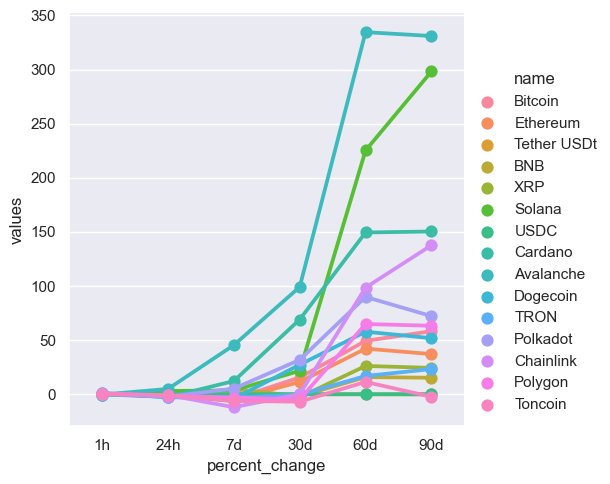

In [54]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [56]:
# To create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,41978.09239,2023-12-15 16:31:14.848770
0,Bitcoin,41978.09239,2023-12-15 16:31:23.002111
0,Bitcoin,41970.84112,2023-12-15 16:32:44.157946
0,Bitcoin,41950.54844,2023-12-15 16:33:44.353161


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

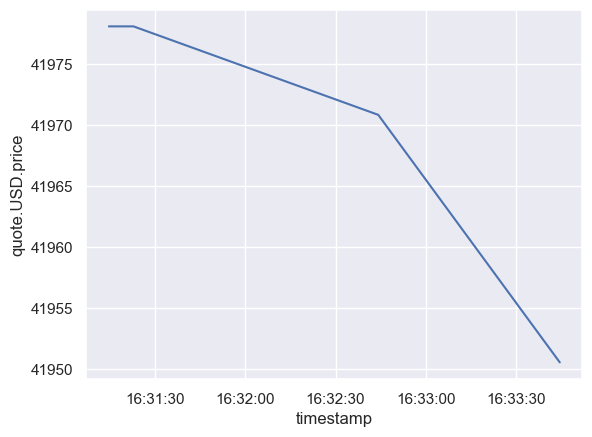

In [51]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)